In [175]:
#Import library

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
!pip install kneed
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.preprocessing import LabelEncoder

In [176]:
#Load dataset

read_file = pd.read_excel(r"C:\Users\ASUS\Downloads\Property Dataset - Clustering (3).xlsx",sheet_name='Data Rumah')
read_file.to_csv(r"C:\Users\ASUS\Downloads\Property Dataset - Clustering (3).csv",index=None,header=True)

url = (r"C:\Users\ASUS\Downloads\Property Dataset - Clustering (3).csv")
df1 = pd.read_csv(url)
df1 = df1.iloc[1:,:]
df1

,Area Category,Nama Daerah,Luas Tanah (m2),Luas Bangunan (m2),Jumlah Kamar,Jumlah Kamar Mandi,Tingkat/Lantai,Harga Penawaran (dari Owner),Terjual/Belum,Arah Hadap Rumah,Posisi Rumah,Lebar Jalan Depan Rumah (ROW)
1,Below Standard,Setro Baru Utara,30.0,60.0,2.0,1.0,2.0,287799000,Belum,NaN,Standard,< 1 Mobil
2,Standard,Kenjeran,170.0,170.0,5.0,4.0,2.0,2699999999,Belum,Selatan,Cul De Sac/Ujung Gang Buntu,1-2 Mobil
3,Sangat Premium,Kenjeran,187.0,250.0,5.0,5.0,2.0,3100000000,Belum,Utara,Standard,1-2 Mobil
4,Premium,Kenjeran,350.0,600.0,5.0,5.0,2.0,5000000000,Belum,Barat,Standard,1-2 Mobil
5,Premium,Kenjeran,450.0,530.0,5.0,6.0,2.0,10800000000,Belum,NaN,Standard,1-2 Mobil
...,...,...,...,...,...,...,...,...,...,...,...,...
303,Standard,Gununganyar,47.0,34.0,2.0,1.0,1.0,450000000,Belum,Utara,NaN,> 2 Mobil
304,Sangat Premium,Sukolilo,300.0,212.0,4.0,4.0,1.0,5250000000,Belum,Selatan,NaN,NaN
305,Premium,Mulyorejo,102.0,156.0,4.0,2.0,2.0,1950000000,Belum,Selatan,Standard,1-2 Mobil
306,Standard,Sukolilo,98.0,170.0,4.0,3.0,2.0,1550000000,Belum,NaN,Standard,> 2 Mobil


In [177]:
#Apakah ada data yang null

df1.isna().any()

Area Category                    False
Nama Daerah                      False
Luas Tanah (m2)                  False
Luas Bangunan (m2)               False
Jumlah Kamar                     False
Jumlah Kamar Mandi                True
Tingkat/Lantai                    True
Harga Penawaran (dari Owner)     False
Terjual/Belum                    False
Arah Hadap Rumah                  True
Posisi Rumah                      True
Lebar Jalan Depan Rumah (ROW)     True
dtype: bool

In [178]:
#Mengisi data null

from random import choices

JumlahKM = ['1','2','3','4','5','6','7','8']
Lantai = ['1','1.5','2','2.5','3','4']
AHR = ['Utara','Selatan','Barat','Timur']
PR = ['Standard','Cul De Sac/Ujung Gang Buntu','Tikungan/Hook','Tusuk Sate','Tusuk Belakang/Membelakangi Jalan','Kantong Belakang/Ngantong']
ROW = ['< 1 Mobil','1-2 Mobil','> 2 Mobil']

lebar = choices(ROW, k=41)
arah = choices(AHR, k=82)
posisi = choices(PR, k=115)

df1['Jumlah Kamar Mandi'].replace([np.nan], df['Jumlah Kamar Mandi'].mode()[0], inplace=True)

df1['Tingkat/Lantai '].replace([np.nan], df1['Tingkat/Lantai '].mode()[0], inplace=True)
for i in df['Arah Hadap Rumah'].isnull():
  df1['Arah Hadap Rumah'].replace([np.nan], arah[i], inplace=True)

for i in df['Posisi Rumah'].isnull():
  df1['Posisi Rumah'].replace([np.nan], posisi[i], inplace=True)

for i in df['Lebar Jalan Depan Rumah (ROW)'].isnull():
  df1['Lebar Jalan Depan Rumah (ROW)'].replace([np.nan], lebar[i], inplace=True)

df1

,Area Category,Nama Daerah,Luas Tanah (m2),Luas Bangunan (m2),Jumlah Kamar,Jumlah Kamar Mandi,Tingkat/Lantai,Harga Penawaran (dari Owner),Terjual/Belum,Arah Hadap Rumah,Posisi Rumah,Lebar Jalan Depan Rumah (ROW)
1,Below Standard,Setro Baru Utara,30.0,60.0,2.0,1.0,2.0,287799000,Belum,Utara,Standard,< 1 Mobil
2,Standard,Kenjeran,170.0,170.0,5.0,4.0,2.0,2699999999,Belum,Selatan,Cul De Sac/Ujung Gang Buntu,1-2 Mobil
3,Sangat Premium,Kenjeran,187.0,250.0,5.0,5.0,2.0,3100000000,Belum,Utara,Standard,1-2 Mobil
4,Premium,Kenjeran,350.0,600.0,5.0,5.0,2.0,5000000000,Belum,Barat,Standard,1-2 Mobil
5,Premium,Kenjeran,450.0,530.0,5.0,6.0,2.0,10800000000,Belum,Utara,Standard,1-2 Mobil
...,...,...,...,...,...,...,...,...,...,...,...,...
303,Standard,Gununganyar,47.0,34.0,2.0,1.0,1.0,450000000,Belum,Utara,Tusuk Sate,> 2 Mobil
304,Sangat Premium,Sukolilo,300.0,212.0,4.0,4.0,1.0,5250000000,Belum,Selatan,Tusuk Sate,< 1 Mobil
305,Premium,Mulyorejo,102.0,156.0,4.0,2.0,2.0,1950000000,Belum,Selatan,Standard,1-2 Mobil
306,Standard,Sukolilo,98.0,170.0,4.0,3.0,2.0,1550000000,Belum,Utara,Standard,> 2 Mobil


In [179]:
#Double check apakah masih ada data null

df1.isna().any()

Area Category                    False
Nama Daerah                      False
Luas Tanah (m2)                  False
Luas Bangunan (m2)               False
Jumlah Kamar                     False
Jumlah Kamar Mandi               False
Tingkat/Lantai                   False
Harga Penawaran (dari Owner)     False
Terjual/Belum                    False
Arah Hadap Rumah                 False
Posisi Rumah                     False
Lebar Jalan Depan Rumah (ROW)    False
dtype: bool

In [180]:
#Transform

le = LabelEncoder()
df1['Area Category'] = le.fit_transform(df1['Area Category'])
df1.head()

,Area Category,Nama Daerah,Luas Tanah (m2),Luas Bangunan (m2),Jumlah Kamar,Jumlah Kamar Mandi,Tingkat/Lantai,Harga Penawaran (dari Owner),Terjual/Belum,Arah Hadap Rumah,Posisi Rumah,Lebar Jalan Depan Rumah (ROW)
1,0,Setro Baru Utara,30.0,60.0,2.0,1.0,2.0,287799000,Belum,Utara,Standard,< 1 Mobil
2,3,Kenjeran,170.0,170.0,5.0,4.0,2.0,2699999999,Belum,Selatan,Cul De Sac/Ujung Gang Buntu,1-2 Mobil
3,2,Kenjeran,187.0,250.0,5.0,5.0,2.0,3100000000,Belum,Utara,Standard,1-2 Mobil
4,1,Kenjeran,350.0,600.0,5.0,5.0,2.0,5000000000,Belum,Barat,Standard,1-2 Mobil
5,1,Kenjeran,450.0,530.0,5.0,6.0,2.0,10800000000,Belum,Utara,Standard,1-2 Mobil


In [181]:
le = LabelEncoder()
df1['Nama Daerah'] = le.fit_transform(df1['Nama Daerah'])
df1.head()

,Area Category,Nama Daerah,Luas Tanah (m2),Luas Bangunan (m2),Jumlah Kamar,Jumlah Kamar Mandi,Tingkat/Lantai,Harga Penawaran (dari Owner),Terjual/Belum,Arah Hadap Rumah,Posisi Rumah,Lebar Jalan Depan Rumah (ROW)
1,0,100,30.0,60.0,2.0,1.0,2.0,287799000,Belum,Utara,Standard,< 1 Mobil
2,3,48,170.0,170.0,5.0,4.0,2.0,2699999999,Belum,Selatan,Cul De Sac/Ujung Gang Buntu,1-2 Mobil
3,2,48,187.0,250.0,5.0,5.0,2.0,3100000000,Belum,Utara,Standard,1-2 Mobil
4,1,48,350.0,600.0,5.0,5.0,2.0,5000000000,Belum,Barat,Standard,1-2 Mobil
5,1,48,450.0,530.0,5.0,6.0,2.0,10800000000,Belum,Utara,Standard,1-2 Mobil


In [182]:
le = LabelEncoder()
df1['Terjual/Belum'] = le.fit_transform(df1['Terjual/Belum'])
df1.head()

,Area Category,Nama Daerah,Luas Tanah (m2),Luas Bangunan (m2),Jumlah Kamar,Jumlah Kamar Mandi,Tingkat/Lantai,Harga Penawaran (dari Owner),Terjual/Belum,Arah Hadap Rumah,Posisi Rumah,Lebar Jalan Depan Rumah (ROW)
1,0,100,30.0,60.0,2.0,1.0,2.0,287799000,0,Utara,Standard,< 1 Mobil
2,3,48,170.0,170.0,5.0,4.0,2.0,2699999999,0,Selatan,Cul De Sac/Ujung Gang Buntu,1-2 Mobil
3,2,48,187.0,250.0,5.0,5.0,2.0,3100000000,0,Utara,Standard,1-2 Mobil
4,1,48,350.0,600.0,5.0,5.0,2.0,5000000000,0,Barat,Standard,1-2 Mobil
5,1,48,450.0,530.0,5.0,6.0,2.0,10800000000,0,Utara,Standard,1-2 Mobil


In [183]:
le = LabelEncoder()
df1['Arah Hadap Rumah'] = le.fit_transform(df1['Arah Hadap Rumah'])
df1.head()

,Area Category,Nama Daerah,Luas Tanah (m2),Luas Bangunan (m2),Jumlah Kamar,Jumlah Kamar Mandi,Tingkat/Lantai,Harga Penawaran (dari Owner),Terjual/Belum,Arah Hadap Rumah,Posisi Rumah,Lebar Jalan Depan Rumah (ROW)
1,0,100,30.0,60.0,2.0,1.0,2.0,287799000,0,3,Standard,< 1 Mobil
2,3,48,170.0,170.0,5.0,4.0,2.0,2699999999,0,1,Cul De Sac/Ujung Gang Buntu,1-2 Mobil
3,2,48,187.0,250.0,5.0,5.0,2.0,3100000000,0,3,Standard,1-2 Mobil
4,1,48,350.0,600.0,5.0,5.0,2.0,5000000000,0,0,Standard,1-2 Mobil
5,1,48,450.0,530.0,5.0,6.0,2.0,10800000000,0,3,Standard,1-2 Mobil


In [184]:
le = LabelEncoder()
df1['Posisi Rumah'] = le.fit_transform(df1['Posisi Rumah'])
df1.head()

,Area Category,Nama Daerah,Luas Tanah (m2),Luas Bangunan (m2),Jumlah Kamar,Jumlah Kamar Mandi,Tingkat/Lantai,Harga Penawaran (dari Owner),Terjual/Belum,Arah Hadap Rumah,Posisi Rumah,Lebar Jalan Depan Rumah (ROW)
1,0,100,30.0,60.0,2.0,1.0,2.0,287799000,0,3,2,< 1 Mobil
2,3,48,170.0,170.0,5.0,4.0,2.0,2699999999,0,1,0,1-2 Mobil
3,2,48,187.0,250.0,5.0,5.0,2.0,3100000000,0,3,2,1-2 Mobil
4,1,48,350.0,600.0,5.0,5.0,2.0,5000000000,0,0,2,1-2 Mobil
5,1,48,450.0,530.0,5.0,6.0,2.0,10800000000,0,3,2,1-2 Mobil


In [185]:
le = LabelEncoder()
df1['Lebar Jalan Depan Rumah (ROW)'] = le.fit_transform(df1['Lebar Jalan Depan Rumah (ROW)'])
df1.head()

,Area Category,Nama Daerah,Luas Tanah (m2),Luas Bangunan (m2),Jumlah Kamar,Jumlah Kamar Mandi,Tingkat/Lantai,Harga Penawaran (dari Owner),Terjual/Belum,Arah Hadap Rumah,Posisi Rumah,Lebar Jalan Depan Rumah (ROW)
1,0,100,30.0,60.0,2.0,1.0,2.0,287799000,0,3,2,1
2,3,48,170.0,170.0,5.0,4.0,2.0,2699999999,0,1,0,0
3,2,48,187.0,250.0,5.0,5.0,2.0,3100000000,0,3,2,0
4,1,48,350.0,600.0,5.0,5.0,2.0,5000000000,0,0,2,0
5,1,48,450.0,530.0,5.0,6.0,2.0,10800000000,0,3,2,0


In [186]:
le = LabelEncoder()
df1['Luas Tanah (m2)'] = le.fit_transform(df1['Luas Tanah (m2)'])
df1.head()

# df1['Luas Tanah (m2)']  = df1['Luas Tanah (m2)'].astype(float)
# df1

,Area Category,Nama Daerah,Luas Tanah (m2),Luas Bangunan (m2),Jumlah Kamar,Jumlah Kamar Mandi,Tingkat/Lantai,Harga Penawaran (dari Owner),Terjual/Belum,Arah Hadap Rumah,Posisi Rumah,Lebar Jalan Depan Rumah (ROW)
1,0,100,5,60.0,2.0,1.0,2.0,287799000,0,3,2,1
2,3,48,69,170.0,5.0,4.0,2.0,2699999999,0,1,0,0
3,2,48,73,250.0,5.0,5.0,2.0,3100000000,0,3,2,0
4,1,48,103,600.0,5.0,5.0,2.0,5000000000,0,0,2,0
5,1,48,115,530.0,5.0,6.0,2.0,10800000000,0,3,2,0


In [187]:
le = LabelEncoder()
df1['Luas Bangunan (m2)'] = le.fit_transform(df1['Luas Bangunan (m2)'])
df1.head()
# df1['Luas Bangunan (m2)'] = df1['Luas Bangunan (m2)'].astype(float)
# df1

,Area Category,Nama Daerah,Luas Tanah (m2),Luas Bangunan (m2),Jumlah Kamar,Jumlah Kamar Mandi,Tingkat/Lantai,Harga Penawaran (dari Owner),Terjual/Belum,Arah Hadap Rumah,Posisi Rumah,Lebar Jalan Depan Rumah (ROW)
1,0,100,5,10,2.0,1.0,2.0,287799000,0,3,2,1
2,3,48,69,50,5.0,4.0,2.0,2699999999,0,1,0,0
3,2,48,73,70,5.0,5.0,2.0,3100000000,0,3,2,0
4,1,48,103,109,5.0,5.0,2.0,5000000000,0,0,2,0
5,1,48,115,106,5.0,6.0,2.0,10800000000,0,3,2,0


In [188]:
le = LabelEncoder()
df1['Harga Penawaran (dari Owner)'] = le.fit_transform(df1['Harga Penawaran (dari Owner)'])
df1.head()
# df1['Harga Penawaran (dari Owner)'] = df1['Harga Penawaran (dari Owner)'].astype(float)
# df1

,Area Category,Nama Daerah,Luas Tanah (m2),Luas Bangunan (m2),Jumlah Kamar,Jumlah Kamar Mandi,Tingkat/Lantai,Harga Penawaran (dari Owner),Terjual/Belum,Arah Hadap Rumah,Posisi Rumah,Lebar Jalan Depan Rumah (ROW)
1,0,100,5,10,2.0,1.0,2.0,79,0,3,2,1
2,3,48,69,50,5.0,4.0,2.0,74,0,1,0,0
3,2,48,73,70,5.0,5.0,2.0,84,0,3,2,0
4,1,48,103,109,5.0,5.0,2.0,124,0,0,2,0
5,1,48,115,106,5.0,6.0,2.0,5,0,3,2,0


In [189]:
# Normalize

standard_sc = StandardScaler()
standard = pd.DataFrame(standard_sc.fit_transform(df1),columns=df1.columns)

scaled_features = standard_sc.fit(df1)

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


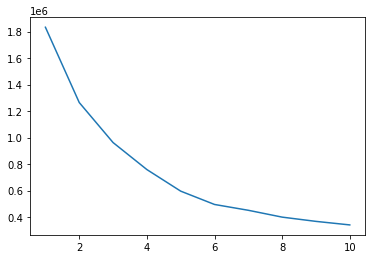

In [190]:
# set the parameter for evaluating K

from sklearn.cluster import KMeans
from sklearn import datasets
from sklearn.utils import shuffle

wcss = []
for k in range(1,11):
    kmeans = KMeans(k)
    kmeans.fit(df1)
    wcss.append(kmeans.inertia_)

plt.plot(range(1,11),wcss)
plt.show()

In [191]:
# using kneelocator to find the elbow/knee

from kneed import KneeLocator
findknee = KneeLocator(range(1,11),wcss,curve="convex",direction="decreasing")
print("The best k for your model is ",findknee.elbow)

The best k for your model is  4


In [197]:
from sklearn.cluster import AgglomerativeClustering
threecl = AgglomerativeClustering(3)
cls = threecl.fit_predict(df1)
df1['Cluster'] = cls
df1.head(5)

,Area Category,Nama Daerah,Luas Tanah (m2),Luas Bangunan (m2),Jumlah Kamar,Jumlah Kamar Mandi,Tingkat/Lantai,Harga Penawaran (dari Owner),Terjual/Belum,Arah Hadap Rumah,Posisi Rumah,Lebar Jalan Depan Rumah (ROW),Cluster,Cluster
1,0,100,5,10,2.0,1.0,2.0,79,0,3,2,1,2,2
2,3,48,69,50,5.0,4.0,2.0,74,0,1,0,0,1,1
3,2,48,73,70,5.0,5.0,2.0,84,0,3,2,0,1,1
4,1,48,103,109,5.0,5.0,2.0,124,0,0,2,0,0,0
5,1,48,115,106,5.0,6.0,2.0,5,0,3,2,0,0,0


In [199]:
#Dataframe kesimpulan dari cluster

df["Cluster"] = cls

df.groupby("Cluster").agg(AreaCategory = ('Area Category', pd.Series.mode),
                                 NamaDaerah = ('Nama Daerah', pd.Series.mode),
                                 LuasTanah = ('Luas Tanah (m2)', 'mean'),
                                 LuasBangunan = ('Luas Bangunan (m2)', 'mean'),
                                 JumlahKamar = ('Jumlah Kamar', pd.Series.mode),
                                 JumlahKamarMandi = ('Jumlah Kamar Mandi', pd.Series.mode),
                                 Tingkat_Lantai = ('Tingkat/Lantai ', pd.Series.mode),
                                 HargaPenawaran =('Harga Penawaran (dari Owner)', 'mean'),
                                 Terjual_Belum =('Terjual/Belum', pd.Series.mode),
                                 ArahHadapRumah =('Arah Hadap Rumah', pd.Series.mode),
                                 PosisiRumah =('Posisi Rumah', pd.Series.mode),
                                 LebarJalanDepanRumah =('Lebar Jalan Depan Rumah (ROW)', pd.Series.mode),
                                count =("Cluster", 'count'))

ValueError: Must produce aggregated value

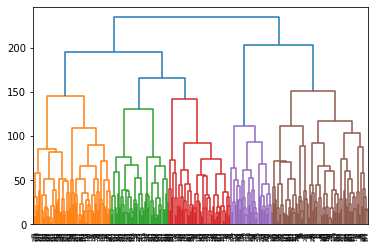

In [200]:
# Try Different Linkage in Hierarchical Model (Single, Ward, Complete, Average) display it with the Dendogram for each Linkage

from scipy.cluster.hierarchy import dendrogram, linkage

dendrogram(linkage(df1,method='complete'))
plt.show()

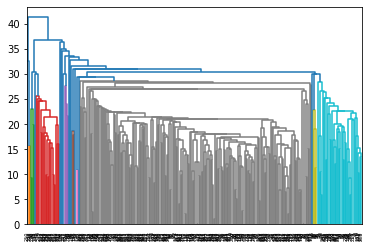

In [201]:
# Try Different Linkage in Hierarchical Model (Single, Ward, Complete, Average) display it with the Dendogram for each Linkage

from scipy.cluster.hierarchy import dendrogram, linkage

dendrogram(linkage(df1,method='single'))
plt.show()

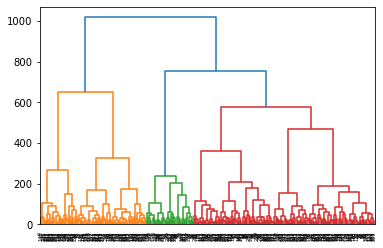

In [202]:
# Try Different Linkage in Hierarchical Model (Single, Ward, Complete, Average) display it with the Dendogram for each Linkage

from scipy.cluster.hierarchy import dendrogram, linkage

dendrogram(linkage(df1,method='ward'))
plt.show()

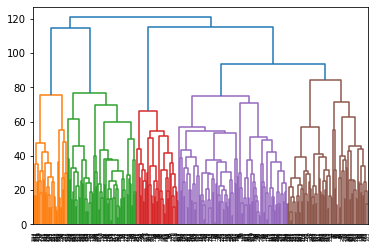

In [203]:
# Try Different Linkage in Hierarchical Model (Single, Ward, Complete, Average) display it with the Dendogram for each Linkage

from scipy.cluster.hierarchy import dendrogram, linkage

dendrogram(linkage(df1,method='average'))
plt.show()

In [204]:
from sklearn.cluster import AgglomerativeClustering 
hc = AgglomerativeClustering(n_clusters = 4, affinity = 'euclidean', linkage ='complete')
hie = hc.fit_predict(df1)
df1['Cluster'] = hie
df1.head(5)

,Area Category,Nama Daerah,Luas Tanah (m2),Luas Bangunan (m2),Jumlah Kamar,Jumlah Kamar Mandi,Tingkat/Lantai,Harga Penawaran (dari Owner),Terjual/Belum,Arah Hadap Rumah,Posisi Rumah,Lebar Jalan Depan Rumah (ROW),Cluster,Cluster
1,0,100,5,10,2.0,1.0,2.0,79,0,3,2,1,1,2
2,3,48,69,50,5.0,4.0,2.0,74,0,1,0,0,0,1
3,2,48,73,70,5.0,5.0,2.0,84,0,3,2,0,0,1
4,1,48,103,109,5.0,5.0,2.0,124,0,0,2,0,3,0
5,1,48,115,106,5.0,6.0,2.0,5,0,3,2,0,0,0


In [205]:
df1["Cluster"] = hie
df1.groupby("Cluster").agg(AreaCategory = ('Area Category', pd.Series.mode),
                                 NamaDaerah = ('Nama Daerah', pd.Series.mode),
                                 LuasTanah = ('Luas Tanah (m2)', 'mean'),
                                 LuasBangunan = ('Luas Bangunan (m2)', 'mean'),
                                 JumlahKamar = ('Jumlah Kamar', pd.Series.mode),
                                 JumlahKamarMandi = ('Jumlah Kamar Mandi', pd.Series.mode),
                                 Tingkat_Lantai = ('Tingkat/Lantai ', pd.Series.mode),
                                 HargaPenawaran =('Harga Penawaran (dari Owner)', 'mean'),
                                 Terjual_Belum =('Terjual/Belum', pd.Series.mode),
                                 ArahHadapRumah =('Arah Hadap Rumah', pd.Series.mode),
                                 PosisiRumah =('Posisi Rumah', pd.Series.mode),
                                 LebarJalanDepanRumah =('Lebar Jalan Depan Rumah (ROW)', pd.Series.mode),
                                count =("Cluster", 'count'))

,AreaCategory,NamaDaerah,LuasTanah,LuasBangunan,JumlahKamar,JumlahKamarMandi,Tingkat_Lantai,HargaPenawaran,Terjual_Belum,ArahHadapRumah,PosisiRumah,LebarJalanDepanRumah,count
Cluster,,,,,,,,,,,,,
0,3,11,84.172727,72.018182,5.0,4.0,2.0,66.581818,0,3,2,2,110
1,3,11,35.727273,34.931818,3.0,2.0,2.0,37.340909,0,3,2,0,88
2,3,30,21.578947,17.342105,2.0,1.0,2.0,143.315789,0,3,2,0,38
3,1,11,98.788732,93.408451,5.0,5.0,2.0,126.676056,0,3,2,2,71
